In [2]:
import pandas as pd

In [ ]:
!pip install afinn
!pip install tweepy
!pip install spacy
!pip install wordcloud

Processing c:\users\yichen\appdata\local\pip\cache\wheels\d5\de\86\7fa56fda12511be47ea0808f3502bc879df4e63ab168ec0406\msgpack_python-0.5.6-cp36-cp36m-win_amd64.whl


In [13]:
from __future__ import division
from afinn import Afinn
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import wordnet, stopwords
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import WordPunctTokenizer
import re
import seaborn as sns
import nltk
import warnings
nltk.download('stopwords')
nltk.download('wordnet')
warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yichen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yichen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
corona_data = pd.read_csv('corona_0312.csv',header=None, names = ['ID','Location','Time','text'])  # read
print(corona_data.shape) 

(508993, 4)


In [9]:
corona_data.head()

,ID,Location,Time,text
0,2297379820,RI,2020-03-11 16:11:36,RT @woodruffbets: Scoop: In a closed-door brie...
1,28065138,CA,2020-03-11 16:11:36,RT @discordapp: An update from us regarding CO...
2,960287213748662273,FL,2020-03-11 16:11:36,RT @highasfuhh: Final Round... #coronavirus ht...
3,187315110,PA,2020-03-11 16:11:37,RT @GirautaOficial: Jordi Cañas denuncia ante ...
4,14674957,TX,2020-03-11 16:11:36,I'm sure that will be very informative. https:...


In [10]:
corona_data.text

0         RT @woodruffbets: Scoop: In a closed-door brie...
1         RT @discordapp: An update from us regarding CO...
2         RT @highasfuhh: Final Round... #coronavirus ht...
3         RT @GirautaOficial: Jordi Cañas denuncia ante ...
4         I'm sure that will be very informative. https:...
                                ...                        
508988    thank You @DWStweets for pressing CDC DrRedfie...
508989    RT @MailOnline: Hundreds of hungry monkeys swa...
508990    RT @maggieNYT: To recap the day - a man who wa...
508991    RT @LyanneSavage: Nobody: \nMe and the homies ...
508992    RT @BradyGlass3: Coronavirus isn’t getting int...
Name: text, Length: 508993, dtype: object

In [11]:
corona_data['text'][38]

'RT @Outkick: “In South Korea, 99.4% of all coronavirus victims — people who get it — are recovering. This is regardless of age. Unfortunate…'

In [15]:
# An example of sentiment analysis - AFINN
afinn = Afinn(emoticons = True)
afinn.score('This is utterly excellent!;)')

5.0

# clean text

In [16]:
#removing all the unuseful characters such as "@,#" and hyper links "https...."
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'       # Removing @text situations
pat2 = r'https?://[A-Za-z0-9./]+'  # Removing hyperlinks
combined_pat = r'|'.join((pat1, pat2))  

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml') # converting possibly unconverted html to text
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    letters_only = re.sub("[^a-zA-Z]", " ", stripped) # Getting read of non text characters
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # We tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

# Looping over every tweet in the data set and applying the tweet_cleaner function it.
clean_tweet_texts = []
for text in corona_data.text:
    clean_tweet_texts.append(tweet_cleaner(text))
clean_tweet_texts




#creating a new DataFrame for the filtered text
corona_data['clean_tweet'] = clean_tweet_texts
corona_data['clean_tweet'].head(50)

0     rt scoop in a closed door briefing last week h...
1                  rt an update from us regarding covid
2                            rt final round coronavirus
3     rt jordi ca as denuncia ante la comisi n europ...
4                i m sure that will be very informative
5     rt in response to increased concerns about cor...
6     why covid is nothing to worry about it will ma...
7     rt breaking cobb county school district report...
8     rt a republican senator lamar alexander just b...
9     rt trump is concerned that declaring an emerge...
10    rt today some million americans remain uninsur...
11    rt if you re in the us my chronically ill frie...
12    rt i am fully prepared to use the full power o...
13    according to italy s national health institute...
14    rt if you re a university with an endowment of...
15    rt boris johnson is totally irresponsible clue...
16    rt us travel restrictions on europe are under ...
17    rt covid helping people realise that some 

In [17]:
len(corona_data)

508993

## score sentiment

In [18]:
# Sentiment analysis with AFINN
afinn = Afinn(emoticons=True)
afinn_scores = [afinn.score(clean_tweet) for clean_tweet in corona_data.clean_tweet]
corona_data['sentiment'] = afinn_scores

In [19]:
corona_data['sentiment'].describe()

count    508993.000000
mean         -0.552957
std           2.619834
min         -39.000000
25%          -2.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: sentiment, dtype: float64

In [20]:
corona_data.head()

,ID,Location,Time,text,clean_tweet,sentiment
0,2297379820,RI,2020-03-11 16:11:36,RT @woodruffbets: Scoop: In a closed-door brie...,rt scoop in a closed door briefing last week h...,3.0
1,28065138,CA,2020-03-11 16:11:36,RT @discordapp: An update from us regarding CO...,rt an update from us regarding covid,0.0
2,960287213748662273,FL,2020-03-11 16:11:36,RT @highasfuhh: Final Round... #coronavirus ht...,rt final round coronavirus,0.0
3,187315110,PA,2020-03-11 16:11:37,RT @GirautaOficial: Jordi Cañas denuncia ante ...,rt jordi ca as denuncia ante la comisi n europ...,-3.0
4,14674957,TX,2020-03-11 16:11:36,I'm sure that will be very informative. https:...,i m sure that will be very informative,0.0


# Discourse analysis

not only English

In [22]:
#creating a new DataFrame for the filtered text
clean_df = pd.DataFrame(corona_data['ID'],columns=['ID'])
clean_df['text'] = clean_tweet_texts

'''# Removing non-english text
#  This function takes in as input a sentence and returns only english words 
def filter_for_english(sent):
    return (" ".join(w for w in nltk.wordpunct_tokenize(sent) \
            if len(wordnet.synsets(w)) > 3 ))
#looping over all tweets to return contained english words
checked_for_english = [filter_for_english(sent) for sent in clean_df.text]
# adding a column with tweets that are in English
clean_df['English_text'] = checked_for_english'''
# adding count columns for number of words per tweet for both clean_text and English only text 
clean_df['Clean_text_len'] = [len(t.split()) for t in clean_df.text]
#clean_df['English_word_count'] = [len(t.split()) for t in clean_df.English_text] # Useful for filtering dataframe on english text
#Filter dataframe by choosing rows that have atleast one english word
#english_df = clean_df[clean_df['English_word_count'] > 0][['id', 'English_text']]
#english_df.head()
clean_df

,ID,text,Clean_text_len
0,2297379820,rt scoop in a closed door briefing last week h...,22
1,28065138,rt an update from us regarding covid,7
2,960287213748662273,rt final round coronavirus,4
3,187315110,rt jordi ca as denuncia ante la comisi n europ...,25
4,14674957,i m sure that will be very informative,8
...,...,...,...
508988,61759749,thank you for pressing cdc drredfield on the l...,20
508989,738935472668319746,rt hundreds of hungry monkeys swarm across tha...,21
508990,2406719387,rt to recap the day a man who was photographed...,22
508991,1269068472,rt nobody me and the homies on our corona trip...,13


English Only

In [24]:
#creating a new DataFrame for the filtered text
clean_df = pd.DataFrame(corona_data['ID'],columns=['ID'])
clean_df['text'] = clean_tweet_texts

# Removing non-english text
#  This function takes in as input a sentence and returns only english words 
def filter_for_english(sent):
    return (" ".join(w for w in nltk.wordpunct_tokenize(sent) \
            if len(wordnet.synsets(w)) > 3 ))
#looping over all tweets to return contained english words
checked_for_english = [filter_for_english(sent) for sent in clean_df.text]
# adding a column with tweets that are in English
clean_df['English_text'] = checked_for_english
# adding count columns for number of words per tweet for both clean_text and English only text 
clean_df['Clean_text_len'] = [len(t.split()) for t in clean_df.text]
clean_df['English_word_count'] = [len(t.split()) for t in clean_df.English_text] # Useful for filtering dataframe on english text
#Filter dataframe by choosing rows that have atleast one english word
english_df = clean_df[clean_df['English_word_count'] > 0][['id', 'English_text']]
english_df.head()
clean_df

,id,text,English_text,Clean_text_len,English_word_count
0,2297379820,rt scoop in a closed door briefing last week h...,scoop in a closed door last house were told s ...,22,14
1,28065138,rt an update from us regarding covid,update us,7,2
2,960287213748662273,rt final round coronavirus,final round,4,2
3,187315110,rt jordi ca as denuncia ante la comisi n europ...,as n a,25,3
4,14674957,i m sure that will be very informative,i m sure will be very,8,6
...,...,...,...,...,...
508988,61759749,thank you for pressing cdc drredfield on the l...,pressing on testing does n,20,5
508989,738935472668319746,rt hundreds of hungry monkeys swarm across tha...,monkeys swarm thai street as gangs fight over ...,21,9
508990,2406719387,rt to recap the day a man who was photographed...,day a man was president tested positive washin...,22,10
508991,1269068472,rt nobody me and the homies on our corona trip...,on corona trip,13,3


In [30]:
clean_df['English_text'].head(50)

0     scoop in a closed door last house were told s ...
1                                             update us
2                                           final round
3                                                as n a
4                                 i m sure will be very
5     in response concerns about are asking certain ...
6                     is worry about will disappear ask
7                   breaking school reports case school
8     a republican just blocked on a bill make easie...
9        trump is concerned declaring hamper is similar
10            today some remain care system is becoming
11    in us ill friend is making face masks there s ...
12    i am prepared use full power federal governmen...
13           according s national average age have died
14                                a dollars lives staff
15    is about tail risk half measures don t work is...
16    us travel on are under a security official say...
17          helping people realise some meetings

## Word Cloud

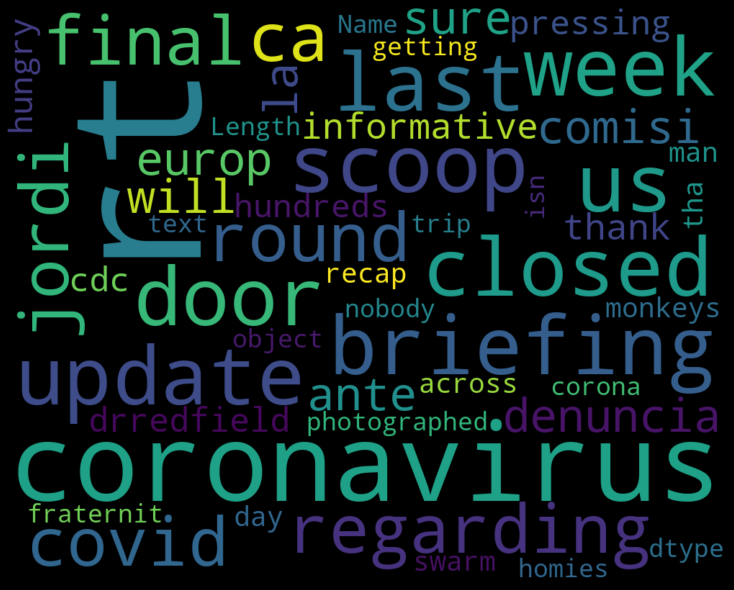

<Figure size 432x288 with 0 Axes>

In [35]:
#generate new wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = clean_df.text
wordcloud = WordCloud(
    width = 1000,
    height = 800,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.savefig("wordcloud.png") 

# most used words

## English Words

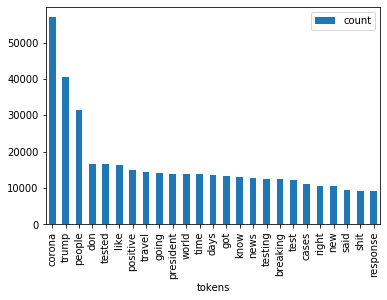

In [36]:
## Inspecting the most common words used in all the observed english tweets
# Breaking into individual words every tweet
def my_tokenizer(text):
    return text.split() if text != None else []
# Breaking all english tweets into individual words and returning a list of these words
tokens = english_df.English_text.map(my_tokenizer).sum()
# most common words in all tweets (stop words included)
counter_wsw = Counter(tokens)
counter_wsw.most_common(20)
# creating a data frame for the most common words with stop words in the tweets for plotting
# >2 to exclude single and doulble lettered words that aren't included among stop words 
word_freq_wsw = pd.DataFrame.from_records([x for x in counter_wsw.most_common(30) if len(x[0])> 2], columns = ['tokens', 'count'])
# removal of stop words and rechecking the most frequent words
def remove_stopwords(tokens):
    return [t for t in tokens if t not in STOP_WORDS]
counter = Counter(remove_stopwords(tokens))
# creating a data frame for the most common words without stop words in the tweets for plotting
word_freq = pd.DataFrame.from_records([x for x in counter.most_common(30) if len(x[0])> 2], columns = ['tokens', 'count'])
# frequency distribution of the top 19 most used words in the twitter data
word_freq.plot(kind = 'bar', x = 'tokens')

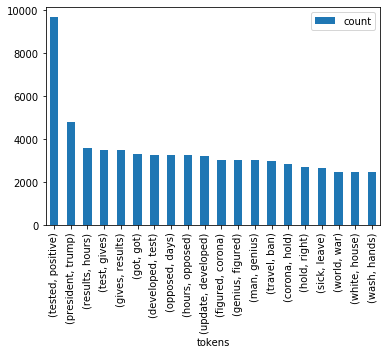

In [37]:
# tokens without stop words and single and double lettered words
tokens_nsw = [x for x in remove_stopwords(tokens) if len(x) > 2]
bigrams = nltk.bigrams(tokens_nsw)
bi_count = Counter(bigrams)
#creating a data frame for the most common words without stop words in the tweets for plotting
bigram_freq = pd.DataFrame.from_records(bi_count.most_common(20), columns = ['tokens', 'count'])
bigram_freq.plot(kind = 'bar', x = 'tokens')

## All Words

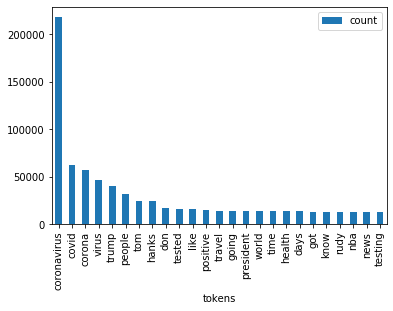

In [23]:
## Inspecting the most common words used in all the observed english tweets
# Breaking into individual words every tweet
def my_tokenizer(text):
    return text.split() if text != None else []
# Breaking all english tweets into individual words and returning a list of these words
tokens = clean_df.text.map(my_tokenizer).sum()
# most common words in all tweets (stop words included)
counter_wsw = Counter(tokens)
counter_wsw.most_common(20)
# creating a data frame for the most common words with stop words in the tweets for plotting
# >2 to exclude single and doulble lettered words that aren't included among stop words 
word_freq_wsw = pd.DataFrame.from_records([x for x in counter_wsw.most_common(30) if len(x[0])> 2], columns = ['tokens', 'count'])
# removal of stop words and rechecking the most frequent words
def remove_stopwords(tokens):
    return [t for t in tokens if t not in STOP_WORDS]
counter = Counter(remove_stopwords(tokens))
# creating a data frame for the most common words without stop words in the tweets for plotting
word_freq = pd.DataFrame.from_records([x for x in counter.most_common(30) if len(x[0])> 2], columns = ['tokens', 'count'])
# frequency distribution of the top 19 most used words in the twitter data
word_freq.plot(kind = 'bar', x = 'tokens')

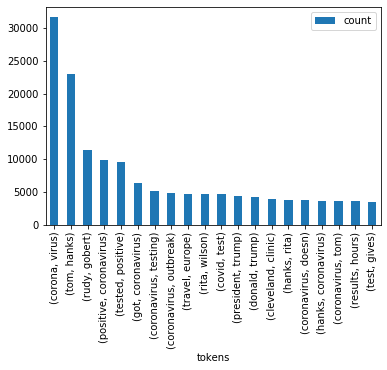

In [24]:
# tokens without stop words and single and double lettered words
tokens_nsw = [x for x in remove_stopwords(tokens) if len(x) > 2]
bigrams = nltk.bigrams(tokens_nsw)
bi_count = Counter(bigrams)
#creating a data frame for the most common words without stop words in the tweets for plotting
bigram_freq = pd.DataFrame.from_records(bi_count.most_common(20), columns = ['tokens', 'count'])
bigram_freq.plot(kind = 'bar', x = 'tokens')

# Data Process for JavaScript

In [108]:
df = pd.read_csv('temp.csv', names = ['Location','Number'])  # read

In [109]:
df

,Location,Number
0,New York,114775.0
1,New Jersey,34124.0
2,Michigan,14225.0
3,California,13649.0
4,Louisiana,12496.0
...,...,...
62,NaN,NaN
63,NaN,NaN
64,NaN,NaN
65,NaN,NaN


In [164]:
    #df = pd.DataFrame({'User_ID': user_id, 'Location': location, 'Created_time': create_time, 'Text':text})
    df.loc[df['Location'].str.contains('AL|Alabama|Yellowhammer ', na=False), 'Location'] = 'AL'
    df.loc[df['Location'].str.contains('AK|Alaska|Last Frontier', na=False), 'Location'] = 'AK'
    df.loc[df['Location'].str.contains('AZ|Arizona|Grand Canyon', na=False), 'Location'] = 'AZ'
    df.loc[df['Location'].str.contains('AR|Arkansas|Natural', na=False), 'Location'] = 'AR'
    df.loc[df['Location'].str.contains('CA|California|Golden', na=False), 'Location'] = 'CA'
    df.loc[df['Location'].str.contains('CO|Colorado|Centennial', na=False), 'Location'] = 'CO'
    df.loc[df['Location'].str.contains('CT|Connecticut|Nutmeg|Constitution', na=False), 'Location'] = 'CT'
    df.loc[df['Location'].str.contains('DE|Delaware|First|Diamond', na=False), 'Location'] = 'DE'
    df.loc[df['Location'].str.contains('FL|Florida|Sunshine', na=False), 'Location'] = 'FL'
    df.loc[df['Location'].str.contains('GA|Georgia|Peach', na=False), 'Location'] = 'GA'
    df.loc[df['Location'].str.contains('HI|Hawaii|Aloha', na=False), 'Location'] = 'HI'
    df.loc[df['Location'].str.contains('ID|Idaho|Gem', na=False), 'Location'] = 'ID'
    df.loc[df['Location'].str.contains('IL|Illinois|Prairie', na=False), 'Location'] = 'IL'
    df.loc[df['Location'].str.contains('IN|Indiana|Hoosier', na=False), 'Location'] = 'IN'
    df.loc[df['Location'].str.contains('IA|Iowa|Hawkeye|Corn', na=False), 'Location'] = 'IA'
    df.loc[df['Location'].str.contains('KS|Kansas|Sunflower', na=False), 'Location'] = 'KS'
    df.loc[df['Location'].str.contains('KY|Kentucky|Bluegrass', na=False), 'Location'] = 'KY'
    df.loc[df['Location'].str.contains('LA|Louisiana|Pelican', na=False), 'Location'] = 'LA'
    df.loc[df['Location'].str.contains('ME|Maine|Vacationland', na=False), 'Location'] = 'ME'
    df.loc[df['Location'].str.contains('MD|Maryland|Old Line', na=False), 'Location'] = 'MD'
    df.loc[df['Location'].str.contains('MA|Massachusetts|Bay', na=False), 'Location'] = 'MA'
    df.loc[df['Location'].str.contains('MI|Michigan|Great Lake|Wolverine', na=False), 'Location'] = 'MI'
    df.loc[df['Location'].str.contains('MN|Minnesota|North Star', na=False), 'Location'] = 'MN'
    df.loc[df['Location'].str.contains('MS|Mississippi|Magnolia', na=False), 'Location'] = 'MS'
    df.loc[df['Location'].str.contains('MO|Missouri|Show Me', na=False), 'Location'] = 'MO'
    df.loc[df['Location'].str.contains('MT|Montana|Treasure', na=False), 'Location'] = 'MT'
    df.loc[df['Location'].str.contains('NE|Nebraska|Cornhusker', na=False), 'Location'] = 'NE'
    df.loc[df['Location'].str.contains('NV|Nevada|Silver', na=False), 'Location'] = 'NV'
    df.loc[df['Location'].str.contains('NH|New Hampshire|Granite', na=False), 'Location'] = 'NH'
    df.loc[df['Location'].str.contains('NJ|New Jersey|Garden', na=False), 'Location'] = 'NJ'
    df.loc[df['Location'].str.contains('NM|New Mexico|Sunshine|Enchantment', na=False), 'Location'] = 'NM'
    df.loc[df['Location'].str.contains('NY|New York|Empire', na=False), 'Location'] = 'NY'
    df.loc[df['Location'].str.contains('NC|North Carolina|Tar Heel', na=False), 'Location'] = 'NC'
    df.loc[df['Location'].str.contains('ND|North Dakota|Flickertail', na=False), 'Location'] = 'ND'
    df.loc[df['Location'].str.contains('OH|Ohio|Buckeye', na=False), 'Location'] = 'OH'
    df.loc[df['Location'].str.contains('OK|Oklahoma|Sooner', na=False), 'Location'] = 'OK'
    df.loc[df['Location'].str.contains('OR|Oregon|Beaver', na=False), 'Location'] = 'OR'
    df.loc[df['Location'].str.contains('PA|Pennsylvania|Keystone', na=False), 'Location'] = 'PA'
    df.loc[df['Location'].str.contains('RI|Rhode Island|Ocean', na=False), 'Location'] = 'RI'
    df.loc[df['Location'].str.contains('SC|South Carolina|Palmetto', na=False), 'Location'] = 'SC'
    df.loc[df['Location'].str.contains('SD|South Dakota|Mount Rushmore', na=False), 'Location'] = 'SD'
    df.loc[df['Location'].str.contains('TN|Tennessee|Volunteer', na=False), 'Location'] = 'TN'
    df.loc[df['Location'].str.contains('TX|Texas|Lone Star', na=False), 'Location'] = 'TX'
    df.loc[df['Location'].str.contains('UT|Utah|Beehive', na=False), 'Location'] = 'UT'
    df.loc[df['Location'].str.contains('VT|Vermont|Green Mountain', na=False), 'Location'] = 'VT'
    df.loc[df['Location'].str.contains('VA|Virginia|Old Dominion', na=False), 'Location'] = 'VA'
    df.loc[df['Location'].str.contains('WA|Washington|DC|Evergreen', na=False), 'Location'] = 'WA'
    df.loc[df['Location'].str.contains('WV|West Virginia|Mountain ', na=False), 'Location'] = 'WV'
    df.loc[df['Location'].str.contains('WI|Wisconsin|Badger', na=False), 'Location'] = 'WI'
    df.loc[df['Location'].str.contains('WY|Wyoming|Equality', na=False), 'Location'] = 'WY'


In [165]:
df

,Location,geometry
0,ME,"(POLYGON ((-67.619761 44.519754, -67.61541 44...."
1,MA,"(POLYGON ((-70.832044 41.606504, -70.823735 41..."
2,MI,"(POLYGON ((-88.684434 48.115785, -88.675628 48..."
3,MT,"POLYGON ((-104.057698 44.997431, -104.250145 4..."
4,NV,"POLYGON ((-114.0506 37.000396, -114.049995 36...."
5,NJ,"POLYGON ((-75.526844 39.655713, -75.5263439999..."
6,NY,"(POLYGON ((-71.943563 41.286675, -71.926802 41..."
7,NC,"(POLYGON ((-82.60287700000001 36.039833, -82.6..."
8,OH,"(POLYGON ((-82.813489 41.723468, -82.810486999..."
9,PA,"POLYGON ((-75.415041 39.801786, -75.428038 39...."


In [112]:
US_list=['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
      'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
      'TX','UT','VT','VA','WA','WV','WI','WY']

In [113]:
Valid_case = df[df['Location'].isin(US_list)]

In [114]:
Valid_case

,Location,Number
0,NY,114775.0
1,NJ,34124.0
2,MI,14225.0
3,CA,13649.0
4,LA,12496.0
5,MA,11736.0
6,FL,11545.0
7,PA,10415.0
8,IL,10357.0
9,WA,7591.0


In [102]:
Lt=corona_data['Location'].value_counts()

In [120]:
Lt_pd = pd.DataFrame({'Count':Lt})

In [131]:
Lt_pd=Lt_pd.reset_index()

In [133]:
Lt_pd=Lt_pd.rename(columns={"index": "Location","Count":"Count"})
Lt_pd

,Location,Count
0,CA,75947
1,TX,51255
2,NY,41962
3,FL,31907
4,WA,22387
5,IL,16926
6,MA,15478
7,GA,15201
8,PA,14737
9,OH,14026


In [156]:
dat_611=Valid_case.set_index('Location').join(Lt_pd.set_index('Location'))
dat_611=dat_611.reset_index()
dat_611=dat_611.rename(columns={"Location": "Location","Number":"Cases","Count":"Twitter"})
dat_611

,Location,Cases,Twitter
0,AK,171.0,1855
1,AL,1633.0,8350
2,AR,743.0,6118
3,AZ,2019.0,11062
4,CA,13649.0,75947
5,CO,4565.0,9600
6,CT,5276.0,5027
7,DE,593.0,2874
8,FL,11545.0,31907
9,GA,6383.0,15201


# Import US States Geojson

In [157]:
import geopandas

In [158]:
countries_gdf = geopandas.read_file("gz_2010_us_040_00_500k.json")

In [160]:
df1=countries_gdf.drop(['STATE'], axis=1)
df2=df1.drop(['GEO_ID'], axis=1)
df3=df2.drop(['LSAD'], axis=1)
df=df3.drop(['CENSUSAREA'], axis=1)


In [162]:
df=df.rename(columns={"NAME": "Location","geometry":"geometry"})
df

,Location,geometry
0,Maine,"(POLYGON ((-67.619761 44.519754, -67.61541 44...."
1,Massachusetts,"(POLYGON ((-70.832044 41.606504, -70.823735 41..."
2,Michigan,"(POLYGON ((-88.684434 48.115785, -88.675628 48..."
3,Montana,"POLYGON ((-104.057698 44.997431, -104.250145 4..."
4,Nevada,"POLYGON ((-114.0506 37.000396, -114.049995 36...."
5,New Jersey,"POLYGON ((-75.526844 39.655713, -75.5263439999..."
6,New York,"(POLYGON ((-71.943563 41.286675, -71.926802 41..."
7,North Carolina,"(POLYGON ((-82.60287700000001 36.039833, -82.6..."
8,Ohio,"(POLYGON ((-82.813489 41.723468, -82.810486999..."
9,Pennsylvania,"POLYGON ((-75.415041 39.801786, -75.428038 39...."


In [191]:
result=df.set_index('Location').join(dat_611.set_index('Location'))
result=result.reset_index()
result

,Location,geometry,Cases,Twitter
0,AK,"(POLYGON ((-164.976199 54.134595, -164.937766 ...",171.0,1855.0
1,AL,"(POLYGON ((-85.002368 31.000682, -85.024108 31...",1633.0,8350.0
2,AR,"POLYGON ((-94.55929 36.499496, -94.51947800000...",743.0,6118.0
3,AZ,"POLYGON ((-109.045223 36.999084, -109.045244 3...",2019.0,11062.0
4,CA,"(POLYGON ((-122.446316 37.861046, -122.438565 ...",13649.0,75947.0
5,CO,"POLYGON ((-102.04224 36.993083, -102.054503 36...",4565.0,9600.0
6,CT,"(POLYGON ((-71.85957000000001 41.322399, -71.8...",5276.0,5027.0
7,DE,"(POLYGON ((-75.55944599999999 39.629812, -75.5...",593.0,2874.0
8,District of Columbia,"POLYGON ((-77.03859799999999 38.791513, -77.03...",NaN,NaN
9,FL,"(POLYGON ((-85.156415 29.679628, -85.137397000...",11545.0,31907.0


In [192]:
a=corona_data.groupby('Location')['sentiment'].mean()

In [193]:
a=a.reset_index()
a

,Location,sentiment
0,AK,-0.554717
1,AL,-0.447186
2,AR,-0.427100
3,AZ,-0.627283
4,CA,-0.610636
5,CO,-0.508021
6,CT,-0.471653
7,DE,-0.576548
8,FL,-0.583822
9,GA,-0.562134


In [194]:
result2=result.set_index('Location').join(a.set_index('Location'))
result2=result2.reset_index()
result2

,Location,geometry,Cases,Twitter,sentiment
0,AK,"(POLYGON ((-164.976199 54.134595, -164.937766 ...",171.0,1855.0,-0.554717
1,AL,"(POLYGON ((-85.002368 31.000682, -85.024108 31...",1633.0,8350.0,-0.447186
2,AR,"POLYGON ((-94.55929 36.499496, -94.51947800000...",743.0,6118.0,-0.427100
3,AZ,"POLYGON ((-109.045223 36.999084, -109.045244 3...",2019.0,11062.0,-0.627283
4,CA,"(POLYGON ((-122.446316 37.861046, -122.438565 ...",13649.0,75947.0,-0.610636
5,CO,"POLYGON ((-102.04224 36.993083, -102.054503 36...",4565.0,9600.0,-0.508021
6,CT,"(POLYGON ((-71.85957000000001 41.322399, -71.8...",5276.0,5027.0,-0.471653
7,DE,"(POLYGON ((-75.55944599999999 39.629812, -75.5...",593.0,2874.0,-0.576548
8,District of Columbia,"POLYGON ((-77.03859799999999 38.791513, -77.03...",NaN,NaN,NaN
9,FL,"(POLYGON ((-85.156415 29.679628, -85.137397000...",11545.0,31907.0,-0.583822


In [195]:
result2['Concern']=result2['Twitter']/result2['Cases']

In [203]:
result2['sentiment'].describe()

count    52.000000
mean     -0.516465
std       0.067636
min      -0.672598
25%      -0.556571
50%      -0.522503
75%      -0.475485
max      -0.356397
Name: sentiment, dtype: float64

In [196]:
result2.head()

,Location,geometry,Cases,Twitter,sentiment,Concern
0,AK,"(POLYGON ((-164.976199 54.134595, -164.937766 ...",171.0,1855.0,-0.554717,10.847953
1,AL,"(POLYGON ((-85.002368 31.000682, -85.024108 31...",1633.0,8350.0,-0.447186,5.113288
2,AR,"POLYGON ((-94.55929 36.499496, -94.51947800000...",743.0,6118.0,-0.427100,8.234186
3,AZ,"POLYGON ((-109.045223 36.999084, -109.045244 3...",2019.0,11062.0,-0.627283,5.478950
4,CA,"(POLYGON ((-122.446316 37.861046, -122.438565 ...",13649.0,75947.0,-0.610636,5.564290


In [204]:
result2.to_file("result_5att.geojson", driver="GeoJSON")